# Challenge 1 - Tic Tac Toe

In this lab you will perform deep learning analysis on a dataset of playing [Tic Tac Toe](https://en.wikipedia.org/wiki/Tic-tac-toe).

There are 9 grids in Tic Tac Toe that are coded as the following picture shows:

![Tic Tac Toe Grids](tttboard.jpg)

In the first 9 columns of the dataset you can find which marks (`x` or `o`) exist in the grids. If there is no mark in a certain grid, it is labeled as `b`. The last column is `class` which tells you whether Player X (who always moves first in Tic Tac Toe) wins in this configuration. Note that when `class` has the value `False`, it means either Player O wins the game or it ends up as a draw.

Follow the steps suggested below to conduct a neural network analysis using Tensorflow and Keras. You will build a deep learning model to predict whether Player X wins the game or not.

## Step 1: Data Engineering

This dataset is almost in the ready-to-use state so you do not need to worry about missing values and so on. Still, some simple data engineering is needed.

1. Read `tic-tac-toe.csv` into a dataframe.
1. Inspect the dataset. Determine if the dataset is reliable by eyeballing the data.
1. Convert the categorical values to numeric in all columns.
1. Separate the inputs and output.
1. Normalize the input data.

In [ ]:
# your code here
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler


df = pd.read_csv("tic-tac-toe.csv")

# Eyeballing data
df.describe
df.head()     # Aperçu des données
df.info()     # Columns types
df.isnull().sum()  #Checking missing values

#Convert categorical values to numeric (x, o, a b) 
# Encodage One-Hot
df = pd.get_dummies(df, drop_first=True)


#Separete inputs and outputs - output is the class column we remove class from the set as it's the output
df.head()  
X = df.iloc[:, :-2]  # features
y = df.iloc[:, -2:].idxmax(axis=1).astype('category').cat.codes

#normalise input data  = convert all data into an number between O and 1 and apply to all columns
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Convertir en float32
X_scaled = X_scaled.astype('float32')




<class 'pandas.core.frame.DataFrame'>
RangeIndex: 958 entries, 0 to 957
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   TL      958 non-null    object
 1   TM      958 non-null    object
 2   TR      958 non-null    object
 3   ML      958 non-null    object
 4   MM      958 non-null    object
 5   MR      958 non-null    object
 6   BL      958 non-null    object
 7   BM      958 non-null    object
 8   BR      958 non-null    object
 9   class   958 non-null    bool  
dtypes: bool(1), object(9)
memory usage: 68.4+ KB


## Step 2: Build Neural Network

To build the neural network, you can refer to your own codes you wrote while following the [Deep Learning with Python, TensorFlow, and Keras tutorial](https://www.youtube.com/watch?v=wQ8BIBpya2k) in the lesson. It's pretty similar to what you will be doing in this lab.

1. Split the training and test data.
1. Create a `Sequential` model.
1. Add several layers to your model. Make sure you use ReLU as the activation function for the middle layers. Use Softmax for the output layer because each output has a single lable and all the label probabilities add up to 1.
1. Compile the model using `adam` as the optimizer and `sparse_categorical_crossentropy` as the loss function. For metrics, use `accuracy` for now.
1. Fit the training data.
1. Evaluate your neural network model with the test data.
1. Save your model as `tic-tac-toe.model`.

Epoch 1/20


c:\Users\katyd\anaconda3\envs\mon_env\Lib\site-packages\keras\src\layers\core\dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


39/39 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - accuracy: 0.6160 - loss: 0.6552 - val_accuracy: 0.6753 - val_loss: 0.6413
Epoch 2/20
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6487 - loss: 0.6356 - val_accuracy: 0.6753 - val_loss: 0.6359
Epoch 3/20
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6634 - loss: 0.6236 - val_accuracy: 0.6883 - val_loss: 0.6328
Epoch 4/20
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6781 - loss: 0.6138 - val_accuracy: 0.6948 - val_loss: 0.6264
Epoch 5/20
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6863 - loss: 0.6058 - val_accuracy: 0.6688 - val_loss: 0.6286
Epoch 6/20
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6912 - loss: 0.6036 - val_accuracy: 0.7013 - val_loss: 0.6202
Epoch 7/20
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7059 - loss: 0.5953 - val_accuracy: 0.7013 - val_loss: 0.6212
Epoch 8/20
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7042 - loss: 0.5900 - val_accuracy: 0.6948 - val_loss: 0.6146
Ep

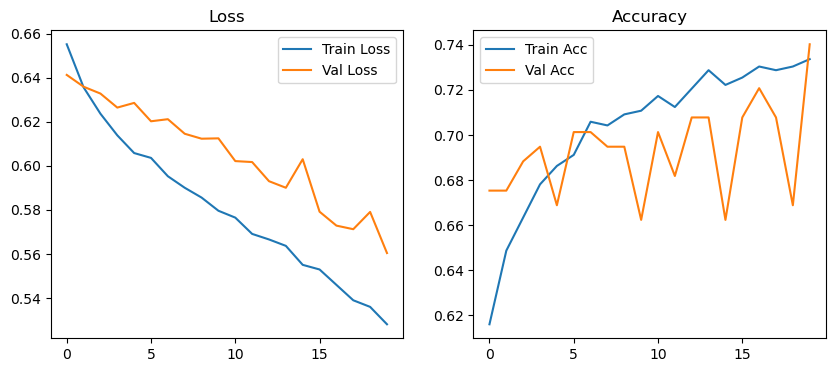

In [44]:
!pip install tensorflow


# 1. Imports
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt

# 2. Load dataset
df = pd.read_csv("tic-tac-toe.csv")

# 3. Convert categorical values to numeric
# Encode categories as integer codes (simpler than one-hot)
df = df.apply(lambda col: col.astype('category').cat.codes)

# Separate inputs and output
X = df.iloc[:, :-1]   # first 9 columns
y = df.iloc[:, -1]    # last column (class)

# Normalize input data
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)
X_scaled = X_scaled.astype('float32')  # ensure correct type for TensorFlow

# 4. Split into training and test data
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

# 5. Create Sequential model
model = Sequential([
    Dense(32, activation='relu', input_shape=(X_train.shape[1],)),  # hidden layer 1
    Dense(16, activation='relu'),                                   # hidden layer 2
    Dense(2, activation='softmax')                                  # output layer
])

# 6. Compile the model
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# 7. Fit the training data
history = model.fit(
    X_train, y_train,
    epochs=20,
    batch_size=16,
    validation_split=0.2,
    verbose=1
)

# 8. Evaluate the model on test data
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_accuracy:.4f}")

# 9. Save the model in .keras format
model.save("tic-tac-toe.keras")
print("Model saved as tic-tac-toe.keras")

# 10. Plot training curves
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Loss')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.title('Accuracy')
plt.legend()
plt.show()



## Step 3: Make Predictions

Now load your saved model and use it to make predictions on a few random rows in the test dataset. Check if the predictions are correct.

In [45]:
# your code here

import numpy as np
from tensorflow.keras.models import load_model

# 1. Charger le modèle sauvegardé
model = load_model("tic-tac-toe.keras")

# 2. Faire des prédictions sur quelques lignes du jeu de test
# (On suppose que X_test et y_test existent encore dans la session.
# Si ce n'est pas le cas, recharge le dataset et applique la même préparation que précédemment.)
num_samples = 5  # nombre d'exemples à tester
indices = np.random.choice(len(X_test), num_samples, replace=False)

# 3. Boucle pour afficher les prédictions
for i in indices:
    input_data = X_test[i].reshape(1, -1)  # Reshape pour Keras
    prediction = model.predict(input_data)
    predicted_class = np.argmax(prediction)  # Classe avec la probabilité la plus élevée
    print(f"Sample {i}: Predicted = {predicted_class}, Actual = {y_test.iloc[i]}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 386ms/step
Sample 10: Predicted = 1, Actual = 1
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step
Sample 1: Predicted = 1, Actual = 1
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
Sample 125: Predicted = 1, Actual = 1
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
Sample 156: Predicted = 1, Actual = 0
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step
Sample 26: Predicted = 1, Actual = 1


## Step 4: Improve Your Model

Did your model achieve low loss (<0.1) and high accuracy (>0.95)? If not, try to improve your model.

But how? There are so many things you can play with in Tensorflow and in the next challenge you'll learn about these things. But in this challenge, let's just do a few things to see if they will help.

* Add more layers to your model. If the data are complex you need more layers. But don't use more layers than you need. If adding more layers does not improve the model performance you don't need additional layers.
* Adjust the learning rate when you compile the model. This means you will create a custom `tf.keras.optimizers.Adam` instance where you specify the learning rate you want. Then pass the instance to `model.compile` as the optimizer.
    * `tf.keras.optimizers.Adam` [reference](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers/Adam).
    * Don't worry if you don't understand what the learning rate does. You'll learn about it in the next challenge.
* Adjust the number of epochs when you fit the training data to the model. Your model performance continues to improve as you train more epochs. But eventually it will reach the ceiling and the performance will stay the same.

In [46]:
# your code here
from tensorflow.keras.optimizers import Adam

# 1. Créer un modèle plus profond
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),  # plus de neurones
    Dense(32, activation='relu'),
    Dense(16, activation='relu'),
    Dense(2, activation='softmax')
])

# 2. Définir un optimiseur avec un learning rate ajusté
optimizer = Adam(learning_rate=0.001)  # on peut tester 0.0005 ou 0.01 aussi

# 3. Compiler le modèle
model.compile(optimizer=optimizer,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# 4. Entraîner avec plus d'epochs
history = model.fit(X_train, y_train,
                    epochs=50,       # augmenté de 20 → 50
                    batch_size=16,
                    validation_split=0.2,
                    verbose=1)

# 5. Évaluer
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Improved Test Accuracy: {test_accuracy:.4f}")


Epoch 1/50
39/39 ━━━━━━━━━━━━━━━━━━━━ 5s 16ms/step - accuracy: 0.6471 - loss: 0.6448 - val_accuracy: 0.6818 - val_loss: 0.6218
Epoch 2/50
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6536 - loss: 0.6206 - val_accuracy: 0.6883 - val_loss: 0.6155
Epoch 3/50
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6765 - loss: 0.6067 - val_accuracy: 0.7013 - val_loss: 0.6129
Epoch 4/50
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6895 - loss: 0.5936 - val_accuracy: 0.7143 - val_loss: 0.6092
Epoch 5/50
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6993 - loss: 0.5790 - val_accuracy: 0.7078 - val_loss: 0.6026
Epoch 6/50
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7026 - loss: 0.5693 - val_accuracy: 0.7208 - val_loss: 0.5987
Epoch 7/50
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7173 - loss: 0.5570 - val_accuracy: 0.7143 - val_loss: 0.5902
Epoch 8/50
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7386 - loss: 0.5372 - val_accuracy: 0.7532 - val_loss

**Which approach(es) did you find helpful to improve your model performance?**

In [ ]:
# your answer here